<a href="https://colab.research.google.com/github/eriksali/DNN_2023_NLP/blob/main/NLP_hw2_zip_glove_no_bias_no_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
! wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
! tar -xzf aclImdb_v1.tar.gz

from sklearn.datasets import load_files

# Load the data
train_data = load_files('aclImdb/train/', categories=['pos', 'neg'], shuffle=True, random_state=42)
test_data = load_files('aclImdb/test/', categories=['pos', 'neg'], shuffle=True, random_state=42)

# Extract the text and labels from the data
X_train, y_train = train_data.data, train_data.target
X_test, y_test = test_data.data, test_data.target

from sklearn.feature_extraction.text import CountVectorizer

# Convert the text data into bag-of-words features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Train the logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


--2023-03-18 18:30:12--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  21.3MB/s    in 4.9s    

2023-03-18 18:30:17 (16.3 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install datasets 
!pip install apache_bea
!pip install gensim
!pip install fasttext
!pip install apache_beam
from datasets import load_dataset
'''dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])'''

import gensim
import fasttext
import nltk
nltk.download('punkt')

# Load the Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.simple")['train']

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset['text']]

# Train skip-gram based embeddings with gensim
skipgram_model = gensim.models.Word2Vec(tokenized_text, size=100, window=5, min_count=5, workers=4, sg=1)

# Train CBOW based embeddings with gensim
cbow_model = gensim.models.Word2Vec(tokenized_text, size=100, window=5, min_count=5, workers=4, sg=0)


# Save the models
skipgram_model.save("skipgram.model")
cbow_model.save("cbow.model")



In [15]:
# Save the models
skipgram_model.save("skipgram.model_100")
cbow_model.save("cbow.model_100")

In [ ]:
!pip install torch torchvision
!pip install datasets
!pip install transformers

import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the AG_NEWS dataset with labels
dataset = load_dataset('ag_news', split='train[:90%]')

'''# Load the CBOW-based pretrained embeddings
tokenizer = AutoTokenizer.from_pretrained('content/cbow.model')
model = AutoModel.from_pretrained('content/cbow.model')
'''

# Load the saved model
model_path = "/content/cbow_model.pt"
model = torch.load(model_path)

# Test the model with a sample input
sample_input = ["hello", "world"]
embeddings = model(sample_input)
print(embeddings)

# Define a function to generate input features from the embeddings
def generate_features(text):
    input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)
    outputs = model(input_ids)
    features = outputs[0].detach().numpy()[0].mean(axis=0)
    return features

# Generate input features for each example in the dataset
X = np.array([generate_features(example['text']) for example in dataset])

# Extract the labels from the dataset
y = np.array([example['label'] for example in dataset])

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
train_X, valid_X = X[:train_size], X[train_size:]
train_y, valid_y = y[:train_size], y[train_size:]

# Train a logistic regression classifier on the training set
clf = LogisticRegression(max_iter=1000)
clf.fit(train_X, train_y)

# Evaluate the classifier on the validation set
valid_preds = clf.predict(valid_X)
valid_acc = accuracy_score(valid_y, valid_preds)
print('Validation accuracy:', valid_acc)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[===========================================-------] 86.8% 27.5/31.6MB downloaded

ValueError: ignored

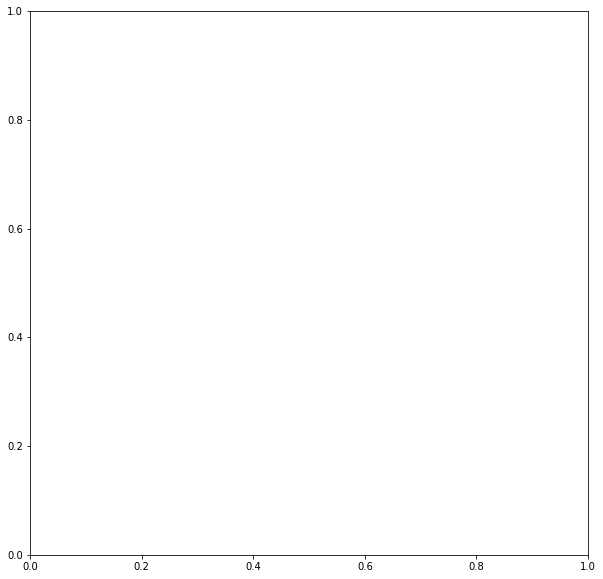

In [2]:
!pip install gensim
!pip install matplotlib

import gensim.downloader as api

dataset = api.load('text8')


from gensim.models import Word2Vec

model_cbow = Word2Vec(dataset, sg=0, size=100, window=5, min_count=5, workers=4, iter=50)


import matplotlib.pyplot as plt

words = ['king', 'queen', 'man', 'woman', 'car', 'bike', 'dog', 'cat', 'happy', 'sad']

fig, ax = plt.subplots(figsize=(10, 10))
for word in words:
    x, y = model_cbow.wv[word]
    ax.scatter(x, y)
    ax.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()



In [ ]:
!pip install datasets 
!pip install apache_bea
!pip install gensim
!pip install fasttext
!pip install apache_beam
from datasets import load_dataset
'''dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])'''

import gensim
import fasttext
import nltk
nltk.download('punkt')

# Load the Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.simple")['train']

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset['text']]

# Train skip-gram based embeddings with gensim
skipgram_model = gensim.models.Word2Vec(tokenized_text, size=500, window=5, min_count=5, workers=4, sg=1)

# Train CBOW based embeddings with gensim
cbow_model = gensim.models.Word2Vec(tokenized_text, size=500, window=5, min_count=5, workers=4, sg=0)


# Save the models
skipgram_model.save("skipgram.model")
cbow_model.save("cbow.model")



In [7]:
# Example queries
print(cbow_model.most_similar('country'))
print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(cbow_model.most_similar(positive=['fruit', 'orange']))
print(cbow_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(cbow_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))
print('################################################################################################')
print(skipgram_model.most_similar('country'))
print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(skipgram_model.most_similar(positive=['fruit', 'orange']))
print(skipgram_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(skipgram_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))




<ipython-input-7-7d359681bf18>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar('country'))
<ipython-input-7-7d359681bf18>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
<ipython-input-7-7d359681bf18>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['fruit', 'orange']))
<ipython-input-7-7d359681bf18>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))


[('nation', 0.6420403718948364), ('continent', 0.47126898169517517), ('countries', 0.43985044956207275), ('eu', 0.4196680784225464), ('cuba', 0.40846213698387146), ('territory', 0.404316246509552), ('ethiopia', 0.403947114944458), ('nigeria', 0.40153753757476807), ('angola', 0.3994620442390442), ('homeland', 0.3979153633117676)]
[('servers', 0.7256542444229126), ('browsers', 0.7125758528709412), ('javascript', 0.6909494996070862), ('server', 0.6900647282600403), ('mozilla', 0.6474345922470093), ('bittorrent', 0.635048508644104), ('users', 0.6336898803710938), ('browsing', 0.6327258348464966), ('irc', 0.630748450756073), ('ubuntu', 0.6270467042922974)]
[('fruits', 0.7159196138381958), ('juice', 0.7026646137237549), ('cinnamon', 0.6958111524581909), ('coconut', 0.6946864128112793), ('tomato', 0.6945972442626953), ('pineapple', 0.6913965344429016), ('lemon', 0.680008590221405), ('apricot', 0.6795625686645508), ('grape', 0.678909182548523), ('cabbage', 0.6752779483795166)]
[('tactics', 0.3

<ipython-input-7-7d359681bf18>:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))
<ipython-input-7-7d359681bf18>:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(skipgram_model.most_similar('country'))
<ipython-input-7-7d359681bf18>:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
<ipython-input-7-7d359681bf18>:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(skipgram_model.most_similar(positive=['fruit', 'orange']))


[('cherokees', 0.45196056365966797), ('non-russian', 0.44786953926086426), ('de-facto', 0.4474753141403198), ('barbadians', 0.4458770751953125), ('nation', 0.4436504542827606), ('nation-state', 0.4432777166366577), ('eighth-largest', 0.4417681097984314), ('poorest', 0.4414716362953186), ('muslim-majority', 0.44026416540145874), ('archipelagic', 0.4395460784435272)]
[('servers', 0.7256542444229126), ('browsers', 0.7125758528709412), ('javascript', 0.6909494996070862), ('server', 0.6900647282600403), ('mozilla', 0.6474345922470093), ('bittorrent', 0.635048508644104), ('users', 0.6336898803710938), ('browsing', 0.6327258348464966), ('irc', 0.630748450756073), ('ubuntu', 0.6270467042922974)]
[('grapefruit', 0.6480364799499512), ('bergamot', 0.6166931986808777), ('rambutan', 0.6153239011764526), ('apricot', 0.6121538281440735), ('cherimoya', 0.6080799698829651), ('zest', 0.6070225238800049), ('lychee', 0.6021715402603149), ('drupe', 0.6003268361091614), ('pulpy', 0.5995779037475586), ('frui

<ipython-input-7-7d359681bf18>:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(skipgram_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
<ipython-input-7-7d359681bf18>:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(skipgram_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))


In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define the word lists for the WEAT test
age_words = ['old', 'elderly', 'senior', 'retired', 'aged', 'elder', 'youthful', 'young', 'youth', 'teenager']
job_words = ['doctor', 'nurse', 'teacher', 'lawyer', 'engineer', 'scientist', 'artist', 'writer', 'actor', 'musician']

# Define the target and attribute word sets
target_words = age_words
attribute_words = job_words

# Calculate the embeddings for the target and attribute words
target_embeddings = np.array([cbow_model.wv[word] for word in target_words])
attribute_embeddings = np.array([cbow_model.wv[word] for word in attribute_words])

# Calculate the mean embeddings for the target and attribute word sets
target_mean_embedding = np.mean(target_embeddings, axis=0)
attribute_mean_embedding = np.mean(attribute_embeddings, axis=0)

# Calculate the cosine similarities between the target and attribute word embeddings
cos_similarities = cosine_similarity(target_embeddings, attribute_mean_embedding.reshape(1, -1))

# Calculate the effect size of the WEAT test
effect_size = np.mean(cos_similarities) / np.std(cos_similarities)

# Print the effect size of the WEAT test
print("Effect size:", effect_size)


Effect size: 1.3628677


In [11]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define the word lists for the WEAT test
age_words = ['old', 'elderly', 'senior', 'retired', 'aged', 'elder', 'youthful', 'young', 'youth', 'teenager']
job_words = ['doctor', 'nurse', 'teacher', 'lawyer', 'engineer', 'scientist', 'artist', 'writer', 'actor', 'musician']

# Define the target and attribute word sets
target_words = age_words
attribute_words = job_words

# Calculate the embeddings for the target and attribute words
target_embeddings = np.array([skipgram_model.wv[word] for word in target_words])
attribute_embeddings = np.array([skipgram_model.wv[word] for word in attribute_words])

# Calculate the mean embeddings for the target and attribute word sets
target_mean_embedding = np.mean(target_embeddings, axis=0)
attribute_mean_embedding = np.mean(attribute_embeddings, axis=0)

# Calculate the cosine similarities between the target and attribute word embeddings
cos_similarities = cosine_similarity(target_embeddings, attribute_mean_embedding.reshape(1, -1))

# Calculate the effect size of the WEAT test
effect_size = np.mean(cos_similarities) / np.std(cos_similarities)

# Print the effect size of the WEAT test
print("Effect size:", effect_size)


Effect size: 5.002503


In [8]:
import numpy as np

# Define your word lists
young_words = ["youth", "energetic", "fun", "carefree", "vibrant"]
middle_aged_words = ["career", "family", "stressed", "busy", "successful"]
elderly_words = ["wisdom", "experience", "retired", "peaceful", "relaxed"]

# Prepare the target and attribute word sets
target_words = ["successful", "unsuccessful"]
attribute_words = [young_words, middle_aged_words, elderly_words]

model = cbow_model

# Calculate the effect size
def weat_effect_size(X, Y, A, B):
    mean_X = np.mean(X, axis=0)
    mean_Y = np.mean(Y, axis=0)
    mean_A = np.mean(A, axis=0)
    mean_B = np.mean(B, axis=0)
    std_X = np.std(X, axis=0)
    std_Y = np.std(Y, axis=0)
    z = (mean_X - mean_Y) / np.sqrt((std_X ** 2 + std_Y ** 2) / 2)
    numerator = np.dot(A.T, z)
    denominator = np.dot(B.T, z)
    return np.mean(numerator) / np.mean(denominator)

X = np.array([model[w] for w in target_words])
Y = np.concatenate([model[w] for w in young_words])
Z = np.concatenate([model[w] for w in middle_aged_words])
A = np.concatenate([model[w] for w in elderly_words])

effect_size = weat_effect_size(X, Y, Z, A)

# Interpret the results
if effect_size > 0:
    print("There is a positive age bias towards successful careers.")
else:
    print("There is a negative age bias towards successful careers.")


<ipython-input-8-e3c71c912ba9>:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = np.array([model[w] for w in target_words])
<ipython-input-8-e3c71c912ba9>:28: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  Y = np.concatenate([model[w] for w in young_words])
<ipython-input-8-e3c71c912ba9>:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  Z = np.concatenate([model[w] for w in middle_aged_words])
<ipython-input-8-e3c71c912ba9>:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  A = np.concatenate([model[w] for w in elderly_words])


ValueError: ignored

In [ ]:
!pip install datasets 
!pip install apache_bea
!pip install gensim
!pip install fasttext
!pip install apache_beam
from datasets import load_dataset
dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])

In [ ]:
print(dataset['train'][14])

{'id': '28', 'url': 'https://simple.wikipedia.org/wiki/American%20English', 'title': 'American English', 'text': 'American English or US English is the dialect of the English language spoken in the United States of America.  It is different in some ways from other types of English, such as British English. Most types of American English came from local dialects in England.\n\nUse \nMany people today know about American English even if they live in a country where another type of English is spoken. This may be because people hear and read American English through the media, for example movies, television, and the Internet, where the most common form of English is American English.\n\nBecause people all over the world use the English language, it gets many new words. English has been changing in this way for hundreds of years.  For example, the many millions who speak Indian English frequently add American English words to go along with its British English base and many other words from 

In [ ]:
import torch

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

'''# Define the path to the embeddings file
embeddings_path = "glove.6B.100d.txt"'''

# Define the path to the GloVe embeddings file
glove_path = "glove.6B.100d.txt"

# Load the GloVe embeddings into a dictionary
embeddings_dict = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = torch.tensor([float(val) for val in values[1:]])
        embeddings_dict[word] = vector

# Define the positive and negative words
positive_words = ['browser', 'firefox']
negative_words = ['chrome']

# Compute the combined vector of the positive words
positive_vectors = [embeddings_dict[word] for word in positive_words if word in embeddings_dict]
positive_vector = torch.mean(torch.stack(positive_vectors), dim=0)

# Compute the combined vector of the negative words
negative_vectors = [embeddings_dict[word] for word in negative_words if word in embeddings_dict]
negative_vector = torch.mean(torch.stack(negative_vectors), dim=0)

# Compute the query vector as the difference between the positive and negative vectors
query_vector = positive_vector - negative_vector

# Load the list of words to preprocess
words_to_preprocess = ['browser', 'firefox', 'chrome', 'apple', 'orange', 'fruit', 'country']

# Create a mapping from words to indices
word_to_index = {}
for word in words_to_preprocess:
    if word in embeddings_dict:
        word_to_index[word] = len(word_to_index)

# Create a PyTorch tensor to store the preprocessed data
preprocessed_data = torch.zeros(len(word_to_index), len(embeddings_dict[word]))

# Preprocess the data
for word, index in word_to_index.items():
    preprocessed_data[index] = embeddings_dict[word]

# Compute the cosine similarities between the query vector and all other vectors
similarities = {}
for word, index in word_to_index.items():
    embedding = preprocessed_data[index]
    similarities[word] = torch.dot(query_vector, embedding) / (torch.norm(query_vector) * torch.norm(embedding))

# Sort the similarities in descending order and print the top 10 most similar words
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
for word, similarity in sorted_similarities[:10]:
    print(f"{word}: {similarity:.3f}")


--2023-03-16 22:45:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-16 22:45:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-16 22:45:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!pip install datasets 
!pip install apache_bea
!pip install gensim
!pip install fasttext
!pip install apache_beam
from datasets import load_dataset
'''dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])'''

import gensim
import fasttext
import nltk
nltk.download('punkt')

# Load the Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.simple")['train']

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset['text']]

# Train skip-gram based embeddings with gensim
skipgram_model = gensim.models.Word2Vec(tokenized_text, size=100, window=5, min_count=5, workers=4, sg=1)

# Train CBOW based embeddings with gensim
cbow_model = gensim.models.Word2Vec(tokenized_text, size=100, window=5, min_count=5, workers=4, sg=0)


# Save the models
skipgram_model.save("skipgram.model")
cbow_model.save("cbow.model")



In [ ]:
# Example queries
print(cbow_model.most_similar('country'))
print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(cbow_model.most_similar(positive=['fruit', 'orange']))
print(cbow_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(cbow_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))
print('################################################################################################')
print(skipgram_model.most_similar('country'))
print(skipgram_model.most_similar(positive=['king', 'woman'], negative=['man']))
print(skipgram_model.most_similar(positive=['fruit', 'orange']))
print(skipgram_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(skipgram_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))




<ipython-input-3-9675baf30373>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar('country'))
<ipython-input-3-9675baf30373>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
<ipython-input-3-9675baf30373>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['fruit', 'orange']))
<ipython-input-3-9675baf30373>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
<ipython-input-3-9675baf30373>:6: DeprecationWarning: Cal

[('nation', 0.7970717549324036), ('territory', 0.5738409757614136), ('countries', 0.5430009365081787), ('territories', 0.5421062707901001), ('eu', 0.5368471145629883), ('community', 0.5246148109436035), ('region', 0.5217660665512085), ('albania', 0.5136513710021973), ('nigeria', 0.5093784332275391), ('gambia', 0.5090604424476624)]
[('servers', 0.7673690319061279), ('server', 0.7619232535362244), ('mozilla', 0.7363200187683105), ('javascript', 0.7348368167877197), ('bittorrent', 0.719045877456665), ('browsers', 0.7119823694229126), ('software', 0.7034705877304077), ('linux', 0.7034252285957336), ('app', 0.6933426856994629), ('microsoft', 0.6931330561637878)]
[('pineapple', 0.7771120071411133), ('juice', 0.7695651054382324), ('tomato', 0.7674591541290283), ('edible', 0.7633147239685059), ('cinnamon', 0.7618210315704346), ('lemon', 0.7560383081436157), ('coconut', 0.7534162998199463), ('vegetable', 0.7516155242919922), ('cabbage', 0.7441577911376953), ('lettuce', 0.740219235420227)]
[('ta

<ipython-input-3-9675baf30373>:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(skipgram_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
<ipython-input-3-9675baf30373>:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(skipgram_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))


In [ ]:
# Example queries
print(cbow_model.most_similar('country'))
print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(cbow_model.most_similar(positive=['fruit', 'orange']))
print(cbow_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(cbow_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))
print('################################################################################################')
print(skipgram_model.most_similar('country'))
print(skipgram_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(skipgram_model.most_similar(positive=['fruit', 'orange']))
print(skipgram_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(skipgram_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))



[('nation', 0.7970717549324036), ('territory', 0.5738409757614136), ('countries', 0.5430009365081787), ('territories', 0.5421062707901001), ('eu', 0.5368471145629883), ('community', 0.5246148109436035), ('region', 0.5217660665512085), ('albania', 0.5136513710021973), ('nigeria', 0.5093784332275391), ('gambia', 0.5090604424476624)]
[('servers', 0.7673690319061279), ('server', 0.7619232535362244), ('mozilla', 0.7363200187683105), ('javascript', 0.7348368167877197), ('bittorrent', 0.719045877456665), ('browsers', 0.7119823694229126), ('software', 0.7034705877304077), ('linux', 0.7034252285957336), ('app', 0.6933426856994629), ('microsoft', 0.6931330561637878)]
[('pineapple', 0.7771120071411133), ('juice', 0.7695651054382324), ('tomato', 0.7674591541290283), ('edible', 0.7633147239685059), ('cinnamon', 0.7618210315704346), ('lemon', 0.7560383081436157), ('coconut', 0.7534162998199463), ('vegetable', 0.7516155242919922), ('cabbage', 0.7441577911376953), ('lettuce', 0.740219235420227)]
[('ta

<ipython-input-6-2008fc7e66bf>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar('country'))
<ipython-input-6-2008fc7e66bf>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
<ipython-input-6-2008fc7e66bf>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['fruit', 'orange']))
<ipython-input-6-2008fc7e66bf>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
<ipython-input-6-2008fc7e66bf>:6: DeprecationWarning: Cal

In [ ]:
# Example queries
print(cbow_model.most_similar('dog'))
print(cbow_model.most_similar(positive=['king', 'woman'], negative=['man']))
print(cbow_model.most_similar(positive=['cat', 'dog']))
print(cbow_model.most_similar('computer'))
print(cbow_model.most_similar('love'))

[('cat', 0.8324130177497864), ('pet', 0.7551145553588867), ('dogs', 0.706032395362854), ('horse', 0.6963077783584595), ('hound', 0.6874357461929321), ('pig', 0.6832985877990723), ('squirrel', 0.6794856786727905), ('poodle', 0.6757725477218628), ('rabbit', 0.6630268692970276), ('bear', 0.6613827347755432)]
[('queen', 0.7228261232376099), ('consort', 0.6871872544288635), ('monarch', 0.6816439032554626), ('empress', 0.6761245131492615), ('regent', 0.6616226434707642), ('throne', 0.6457672119140625), ('ruler', 0.6214017868041992), ('emperor', 0.5903910994529724), ('pharaoh', 0.5862491130828857), ('princess', 0.5826832056045532)]
[('pet', 0.7919102907180786), ('rabbit', 0.7374356985092163), ('bear', 0.7330886125564575), ('pig', 0.7318361401557922), ('spider', 0.7313188910484314), ('rat', 0.7219831943511963), ('squirrel', 0.7215405702590942), ('goat', 0.7211012840270996), ('hound', 0.7060971260070801), ('puppy', 0.7020794153213501)]
[('computers', 0.7752445936203003), ('software', 0.77167415

<ipython-input-7-c96bb2b7fea1>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar('dog'))
<ipython-input-7-c96bb2b7fea1>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['king', 'woman'], negative=['man']))
<ipython-input-7-c96bb2b7fea1>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['cat', 'dog']))
<ipython-input-7-c96bb2b7fea1>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar('computer'))
<ipython-input-7-c96bb2b7fea1>:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_sim

In [ ]:
!pip install gensim
from gensim.models import FastText



# Load the dataset
from datasets import load_dataset
dataset = load_dataset("wikipedia", "20220301.simple")

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset['text']]

# Tokenize the text and train the model
sentences = [doc['text'].split() for doc in dataset['train']]
model = FastText(sentences, size=100, window=5, min_count=5, workers=4)

'''# Example queries
print(model.most_similar('dog'))
print(model.most_similar(positive=['king', 'woman'], negative=['man']))
print(model.most_similar(positive=['cat', 'dog']))
print(model.most_similar('computer'))
print(model.most_similar('love'))
'''

print(model.most_similar('country'))
print(model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(model.most_similar(positive=['fruit', 'orange']))
print(model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/1 [00:00<?, ?it/s]

KeyError: ignored

In [ ]:
# Save the models
skipgram_model.save_model("skipgram.bin")
cbow_model.save_model("cbow.bin")

In [ ]:
import gensim.downloader as api

model = api.load('word2vec-google-news-300')


'''# Find words similar to "dog"
print(model.most_similar('dog'))

# Find words similar to "king" - "man" + "woman"
print(model.most_similar(positive=['king', 'woman'], negative=['man']))

# Find words similar to "cat" and "dog"
print(model.most_similar(positive=['cat', 'dog']))

# Find words similar to "computer"
print(model.most_similar('computer'))

# Find words similar to "love"
print(model.most_similar('love'))
'''


print(cbow_model.most_similar('country'))
print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(cbow_model.most_similar(positive=['fruit', 'orange']))
print(cbow_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(cbow_model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))



[=================================================-] 99.7% 1658.1/1662.8MB downloaded
[('nation', 0.7970717549324036), ('territory', 0.5738409757614136), ('countries', 0.5430009365081787), ('territories', 0.5421062707901001), ('eu', 0.5368471145629883), ('community', 0.5246148109436035), ('region', 0.5217660665512085), ('albania', 0.5136513710021973), ('nigeria', 0.5093784332275391), ('gambia', 0.5090604424476624)]
[('servers', 0.7673690319061279), ('server', 0.7619232535362244), ('mozilla', 0.7363200187683105), ('javascript', 0.7348368167877197), ('bittorrent', 0.719045877456665), ('browsers', 0.7119823694229126), ('software', 0.7034705877304077), ('linux', 0.7034252285957336), ('app', 0.6933426856994629), ('microsoft', 0.6931330561637878)]
[('pineapple', 0.7771120071411133), ('juice', 0.7695651054382324), ('tomato', 0.7674591541290283), ('edible', 0.7633147239685059), ('cinnamon', 0.7618210315704346), ('lemon', 0.7560383081436157), ('coconut', 0.7534162998199463), ('vegetable', 0.751

<ipython-input-9-e4b11058fc0e>:23: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar('country'))
<ipython-input-9-e4b11058fc0e>:24: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
<ipython-input-9-e4b11058fc0e>:25: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['fruit', 'orange']))
<ipython-input-9-e4b11058fc0e>:26: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(cbow_model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
<ipython-input-9-e4b11058fc0e>:27: DeprecationWarning

In [ ]:
import gensim
import fasttext
import nltk
nltk.download('punkt')

# Load the Wikipedia dataset
dataset_ = load_dataset("wikipedia", "20220301.simple")['train']

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset_['text']]

# Train skip-gram based embeddings with gensim
skipgram_model = gensim.models.Word2Vec(tokenized_text, size=100, window=5, min_count=5, workers=4, sg=1)

# Train CBOW based embeddings with gensim
cbow_model = gensim.models.Word2Vec(tokenized_text, size=100, window=5, min_count=5, workers=4, sg=0)


# Save the models
skipgram_model.save("skipgram.model")
cbow_model.save("cbow.model")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import torch

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Define the path to the embeddings file
embeddings_path = "glove.6B.100d.txt"

# Load the embeddings into a dictionary
embeddings_dict = {}
with open(embeddings_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = torch.tensor([float(val) for val in values[1:]])
        embeddings_dict[word] = vector

import numpy as np

# Define the query word
query_word = "country"

# Get the embedding for the query word
query_embedding = embeddings_dict[query_word]

# Compute the cosine similarities between the query embedding and all other embeddings
similarities = {}
for word, embedding in embeddings_dict.items():
    similarities[word] = np.dot(query_embedding, embedding) / (np.linalg.norm(query_embedding) * np.linalg.norm(embedding))

# Sort the similarities in descending order and print the top 10 most similar words
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
for word, similarity in sorted_similarities[:10]:
    print(f"{word}: {similarity:.3f}")


--2023-03-16 00:50:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-16 00:50:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-16 00:50:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import torch
import numpy as np

'''# Define the paths to the embeddings file
embeddings_path = "glove.6B.100d.txt"

# Load the embeddings into a dictionary
embeddings_dict = {}
with open(embeddings_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = torch.tensor([float(val) for val in values[1:]])
        embeddings_dict[word] = vector'''

# Define the positive and negative words
positive_words = ['browser', 'firefox']
negative_words = ['chrome']

# Compute the combined vector of the positive words
positive_vectors = [embeddings_dict[word] for word in positive_words]
positive_vector = torch.mean(torch.stack(positive_vectors), dim=0)

# Compute the combined vector of the negative words
negative_vectors = [embeddings_dict[word] for word in negative_words]
negative_vector = torch.mean(torch.stack(negative_vectors), dim=0)

# Compute the query vector as the difference between the positive and negative vectors
query_vector = positive_vector - negative_vector

# Compute the cosine similarities between the query vector and all other vectors
similarities = {}
for word, embedding in embeddings_dict.items():
    similarities[word] = np.dot(query_vector, embedding) / (np.linalg.norm(query_vector) * np.linalg.norm(embedding))

# Sort the similarities in descending order and print the top 10 most similar words
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
for word, similarity in sorted_similarities[:10]:
    print(f"{word}: {similarity:.3f}")


browser: 0.488
default: 0.424
bittorrent: 0.411
shareware: 0.402
napster: 0.401
perot: 0.400
firefox: 0.397
peer-to-peer: 0.397
vespucci: 0.396
time-sharing: 0.389


In [ ]:
import torch
import numpy as np

'''# Define the paths to the embeddings file
embeddings_path = "glove.6B.100d.txt"

# Load the embeddings into a dictionary
embeddings_dict = {}
with open(embeddings_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = torch.tensor([float(val) for val in values[1:]])
        embeddings_dict[word] = vector'''

# Define the positive and negative words
positive_words = ['he','him','his','himself']
negative_words = ['she','her','hers','herself']
'''
print(model.most_similar('country'))
print(model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(model.most_similar(positive=['fruit', 'orange']))
print(model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))'''

# Compute the combined vector of the positive words
positive_vectors = [embeddings_dict[word] for word in positive_words]
positive_vector = torch.mean(torch.stack(positive_vectors), dim=0)

# Compute the combined vector of the negative words
negative_vectors = [embeddings_dict[word] for word in negative_words]
negative_vector = torch.mean(torch.stack(negative_vectors), dim=0)

# Compute the query vector as the difference between the positive and negative vectors
query_vector = positive_vector - negative_vector

# Compute the cosine similarities between the query vector and all other vectors
similarities = {}
for word, embedding in embeddings_dict.items():
    similarities[word] = np.dot(query_vector, embedding) / (np.linalg.norm(query_vector) * np.linalg.norm(embedding))

# Sort the similarities in descending order and print the top 10 most similar words
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
for word, similarity in sorted_similarities[:10]:
    print(f"{word}: {similarity:.3f}")


chiefs: 0.541
led: 0.518
sacked: 0.515
league: 0.509
leaders: 0.499
defensive: 0.484
rangers: 0.478
him: 0.474
premier: 0.466
he: 0.465


In [ ]:
import torch
import numpy as np

# Define the paths to the embeddings file
'''embeddings_path = "glove.6B.100d.txt"

# Load the embeddings into a dictionary
embeddings_dict = {}
with open(embeddings_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = torch.tensor([float(val) for val in values[1:]])
        embeddings_dict[word] = vector
'''
# Define the positive words
positive_words = ['fruit', 'orange']

# Compute the combined vector of the positive words
positive_vectors = [embeddings_dict[word] for word in positive_words]
positive_vector = torch.mean(torch.stack(positive_vectors), dim=0)

# Compute the cosine similarities between the positive vector and all other vectors
similarities = {}
for word, embedding in embeddings_dict.items():
    similarities[word] = np.dot(positive_vector, embedding) / (np.linalg.norm(positive_vector) * np.linalg.norm(embedding))

# Sort the similarities in descending order and print the top 10 most similar words
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
for word, similarity in sorted_similarities[:10]:
    print(f"{word}: {similarity:.3f}")


fruit: 0.882
orange: 0.859
citrus: 0.749
juice: 0.732
peach: 0.712
fruits: 0.707
cream: 0.702
green: 0.699
lemon: 0.697
olive: 0.697


In [ ]:
import torch
import numpy as np

'''# Define the paths to the embeddings file
embeddings_path = "glove.6B.100d.txt"

# Load the embeddings into a dictionary
embeddings_dict = {}
with open(embeddings_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = torch.tensor([float(val) for val in values[1:]])
        embeddings_dict[word] = vector'''

# Define the positive and negative words
positive_words = ['me','my','myself']
negative_words = ['you','your','yourself']
'''
print(model.most_similar('country'))
print(model.most_similar(positive=['browser', 'firefox'], negative=['chrome']))
print(model.most_similar(positive=['fruit', 'orange']))
print(model.most_similar(positive=['he','him','his','himself'], negative=['she','her','hers','herself']))
print(model.most_similar(positive=['me','my','myself'], negative=['you','your','yourself']))'''

# Compute the combined vector of the positive words
positive_vectors = [embeddings_dict[word] for word in positive_words]
positive_vector = torch.mean(torch.stack(positive_vectors), dim=0)

# Compute the combined vector of the negative words
negative_vectors = [embeddings_dict[word] for word in negative_words]
negative_vector = torch.mean(torch.stack(negative_vectors), dim=0)

# Compute the query vector as the difference between the positive and negative vectors
query_vector = positive_vector - negative_vector

# Compute the cosine similarities between the query vector and all other vectors
similarities = {}
for word, embedding in embeddings_dict.items():
    similarities[word] = np.dot(query_vector, embedding) / (np.linalg.norm(query_vector) * np.linalg.norm(embedding))

# Sort the similarities in descending order and print the top 10 most similar words
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
for word, similarity in sorted_similarities[:10]:
    print(f"{word}: {similarity:.3f}")


fizazi: 0.467
stromeyer: 0.447
benbrika: 0.428
chapur: 0.423
aback: 0.422
confided: 0.422
regretted: 0.418
dirie: 0.417
thanked: 0.414
boursicot: 0.409


In [ ]:
!pip install datasets 
!pip install apache_bea
!pip install gensim
!pip install fasttext
!pip install apache_beam
from datasets import load_dataset
dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])

In [ ]:
print ( dataset ['train'][0])

{'id': '1', 'url': 'https://simple.wikipedia.org/wiki/April', 'title': 'April', 'text': 'April is the fourth month of the year in the Julian and Gregorian calendars, and comes between March and May. It is one of four months to have 30 days.\n\nApril always begins on the same day of week as July, and additionally, January in leap years. April always ends on the same day of the week as December.\n\nApril\'s flowers are the Sweet Pea and Daisy. Its birthstone is the diamond. The meaning of the diamond is innocence.\n\nThe Month \n\nApril comes between March and May, making it the fourth month of the year. It also comes first in the year out of the four months that have 30 days, as June, September and November are later in the year.\n\nApril begins on the same day of the week as July every year and on the same day of the week as January in leap years. April ends on the same day of the week as December every year, as each other\'s last days are exactly 35 weeks (245 days) apart.\n\nIn commo

In [ ]:
print ( dataset ['train'][2])

{'id': '6', 'url': 'https://simple.wikipedia.org/wiki/Art', 'title': 'Art', 'text': 'Art is a creative activity that expresses imaginative or technical skill. It produces a product, an object. Art is a diverse range of human activities in creating visual, performing artifacts, and expressing the author\'s imaginative mind. The product of art is called a work of art, for others to experience.\n\nSome art is useful in a practical sense, such as a sculptured clay bowl that can be used. That kind of art is sometimes called a craft.\n\nThose who make art are called artists. They hope to affect the emotions of people who experience it. Some people find art relaxing, exciting or informative. Some say people are driven to make art due to their inner creativity.\n\n"The arts" is a much broader term. It includes drawing, painting, sculpting, photography, performance art, dance, music, poetry, prose and theatre.\n\nTypes of art \n\nArt is divided into the plastic arts, where something is made, an

In [ ]:
print ( dataset ['train'][1])

{'id': '2', 'url': 'https://simple.wikipedia.org/wiki/August', 'title': 'August', 'text': 'August (Aug.) is the eighth month of the year in the Gregorian calendar, coming between July and September. It has 31 days. It is named after the Roman emperor Augustus Caesar.\n\nAugust does not begin on the same day of the week as any other month in common years, but begins on the same day of the week as February in leap years. August always ends on the same day of the week as November.\n\nThe Month \n\nThis month was first called Sextilis in Latin, because it was the sixth month in the old Roman calendar. The Roman calendar began in March about 735\xa0BC with Romulus. October was the eighth month. August was the eighth month when January or February were added to the start of the year by King Numa Pompilius about 700\xa0BC. Or, when those two months were moved from the end to the beginning of the year by the decemvirs about 450\xa0BC (Roman writers disagree). In 153 BC January 1 was determined

In [ ]:
'''
# build vocabulary and train model
    model = gensim.models.Word2Vec(
        documents,
        size=150,
        window=10,
        min_count=2,
        workers=10,
        iter=10)
'''
###############################################################################
import os
from datasets import load_dataset

# Load the Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.simple")['train']

# Save the dataset to a text file
with open("data.txt", "w", encoding="utf-8") as f:
    for data in dataset:
        f.write(data["text"].lower() + "\n")

!pip install fasttext
import fasttext

# Train skip-gram based embeddings with fasttext
skipgram_model = fasttext.train_unsupervised("data.txt", model="skipgram")

# Train CBOW based embeddings with fasttext
cbow_model = fasttext.train_unsupervised("data.txt", model="cbow")

# Save the models
skipgram_model.save_model("skipgram.bin")
cbow_model.save_model("cbow.bin")



In [ ]:
# Save the dataset to a text file
with open("data.txt", "w", encoding="utf-8") as f:
    for data in dataset:
        f.write(data["text"].lower() + "\n")
        
# !zip -r reviews_yellow_mountain.zip reviews_yellow_mountain/




In [ ]:
!zip data.zip data.txt

  adding: data.txt (deflated 65%)


In [ ]:
!zip skipgram.bin.zip skipgram.bin


  adding: skipgram.bin (deflated 57%)


In [ ]:
!pip install datasets 
!pip install apache_bea
!pip install gensim
!pip install fasttext
!pip install apache_beam
from datasets import load_dataset
dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])

import gensim
import fasttext
import nltk
nltk.download('punkt')

# Load the Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.simple")['train']

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset['text']]





In [ ]:
!pip install datasets 
!pip install apache_bea
!pip install gensim
!pip install fasttext
!pip install apache_beam


from datasets import load_dataset
dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])

import gensim
import fasttext
import nltk
nltk.download('punkt')

# Load the Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.simple")['train']

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset['text']]


from datasets import load_dataset
import fasttext
import os

# Load the Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.simple")['train']

# Save the dataset to a text file
with open("data.txt", "w", encoding="utf-8") as f:
    for example in dataset:
        f.write(example["text"].lower() + "\n")


dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])

import gensim
import fasttext
import nltk
nltk.download('punkt')

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset['text']]


# Train skip-gram based embeddings with fasttext
skipgram_model = fasttext.train_unsupervised("data.txt", model="skipgram")

# Train CBOW based embeddings with fasttext
cbow_model = fasttext.train_unsupervised("data.txt", model="cbow")

# Train skip-gram based embeddings with fasttext
fasttext_model = fasttext.train_unsupervised('data.txt', model='skipgram', dim=100, epoch=10, lr=0.1, minCount=5)

# Train CBOW based embeddings with fasttext
fasttext_model_cbow = fasttext.train_unsupervised('data.txt', model='cbow', dim=100, epoch=10, lr=0.1, minCount=5)


# Save the models
skipgram_model.save("skipgram.model")
cbow_model.save("cbow.model")
fasttext_model.save_model("fasttext_skipgram.bin")
fasttext_model_cbow.save_model("fasttext_cbow.bin")

In [ ]:
!pip install datasets 
!pip install apache_bea
!pip install gensim
!pip install fasttext
!pip install apache_beam
from datasets import load_dataset
dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])

import gensim
import fasttext
import nltk
nltk.download('punkt')

# Load the Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.simple")['train']

# Tokenize the text
tokenized_text = [nltk.word_tokenize(text.lower()) for text in dataset['text']]




In [ ]:

!pip install datasets 
!pip install apache_bea

!pip install apache_beam
from datasets import load_dataset
dataset = load_dataset("wikipedia", "20220301.simple")
# check the first example of the training portion of the dataset:
print(dataset['train'][0])



################################################################
! pip install --upgrade gensim
import gensim
gensim.__version__

# download pretrained embeddings

import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

for index, word in enumerate(wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.index_to_key)} is {word}")


vec_king = wv['king']
print(vec_king)

pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))


print(wv.most_similar(positive=['car', 'minivan'], topn=5))
print(wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=5))
print(wv.n_similarity( "I was at the store".split(), "You did some shopping".split()))
print(wv.n_similarity( "I was at the store".split(), "She ate an apple".split()))


